# Dataset 

https://www.kaggle.com/mariaren/covid19-healthy-diet-dataset

# Problem definition 

We chose a dataset combining different types of food, world population obesity and undernourished rate, and global covid cases count from around the world.

The idea is to understand how a healthy eating style could help combat the coronavirus, distinguishing the diet patterns from countries with lower COVID infection rate.

Our goal here is to provide diet recommendations based on our findings.

Each dataset provides different diet measure different categories of food, depending on what we want to focus on, so we have

- fat quantity,
- energy intake (kcal),
- food supply quantity (kg),
- protein for different categories of food

To which have been added:

- obesity rate
- undernourished rate
- the most up to date confirmed/deaths/recovered/active cases.

We are going to focus on the fat quantity dataset.

In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
from sklearn.tree import export_graphviz, plot_tree
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.svm import LinearSVC, SVC, SVR

Let's start by loading the data

In [2]:
fat_quantity = pd.read_csv("./data/Fat_Supply_Quantity_Data.csv")

 ## Data Exploration and Processing

Now let's explore the dataset:
- check the head


In [3]:
fat_quantity.head()

,Country,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetable Oils,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,0.0,21.6397,6.2224,0.0,8.0353,0.6859,0.0327,0.4246,6.1244,...,17.0831,0.3593,4.5,29.8,0.125149,0.005058,0.098263,0.021827,38928000.0,%
1,Albania,0.0,32.0002,3.4172,0.0,2.6734,1.6448,0.1445,0.6418,8.7428,...,9.2443,0.6503,22.3,6.2,1.733298,0.035800,0.874560,0.822939,2838000.0,%
2,Algeria,0.0,14.4175,0.8972,0.0,4.2035,1.2171,0.2008,0.5772,3.8961,...,27.3606,0.5145,26.6,3.9,0.208754,0.005882,0.137268,0.065604,44357000.0,%
3,Angola,0.0,15.3041,1.3130,0.0,6.5545,0.1539,1.4155,0.3488,11.0268,...,22.4638,0.1231,6.8,25,0.050049,0.001144,0.027440,0.021465,32522000.0,%
4,Antigua and Barbuda,0.0,27.7033,4.6686,0.0,3.2153,0.3872,1.5263,1.2177,14.3202,...,14.4436,0.2469,19.1,NaN,0.151020,0.005102,0.140816,0.005102,98000.0,%


- the columns

In [4]:
fat_quantity.columns

Index(['Country', 'Alcoholic Beverages', 'Animal Products', 'Animal fats',
       'Aquatic Products, Other', 'Cereals - Excluding Beer', 'Eggs',
       'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat', 'Miscellaneous',
       'Milk - Excluding Butter', 'Offals', 'Oilcrops', 'Pulses', 'Spices',
       'Starchy Roots', 'Stimulants', 'Sugar Crops', 'Sugar & Sweeteners',
       'Treenuts', 'Vegetal Products', 'Vegetable Oils', 'Vegetables',
       'Obesity', 'Undernourished', 'Confirmed', 'Deaths', 'Recovered',
       'Active', 'Population', 'Unit (all except Population)'],
      dtype='object')

- the variable types

In [5]:
fat_quantity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       170 non-null    object 
 1   Alcoholic Beverages           170 non-null    float64
 2   Animal Products               170 non-null    float64
 3   Animal fats                   170 non-null    float64
 4   Aquatic Products, Other       170 non-null    float64
 5   Cereals - Excluding Beer      170 non-null    float64
 6   Eggs                          170 non-null    float64
 7   Fish, Seafood                 170 non-null    float64
 8   Fruits - Excluding Wine       170 non-null    float64
 9   Meat                          170 non-null    float64
 10  Miscellaneous                 170 non-null    float64
 11  Milk - Excluding Butter       170 non-null    float64
 12  Offals                        170 non-null    float64
 13  Oilcr

Let's create a function to **check missing data** and unveil **the percentage of data missing** for each dataframe

In [6]:
###Datawrangler

Delete the countries for which values are missing.

In [7]:
fat_quantity.isnull().sum().sum()

36

In [8]:
fat_quantity_clean = (fat_quantity.dropna(how='any')
                      .drop(['Unit (all except Population)'], axis=1)
                      )
                      

In [9]:
fat_quantity_clean

,Country,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetal Products,Vegetable Oils,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population
0,Afghanistan,0.0000,21.6397,6.2224,0.0,8.0353,0.6859,0.0327,0.4246,6.1244,...,28.3684,17.0831,0.3593,4.5,29.8,0.125149,0.005058,0.098263,0.021827,38928000.0
1,Albania,0.0000,32.0002,3.4172,0.0,2.6734,1.6448,0.1445,0.6418,8.7428,...,17.9998,9.2443,0.6503,22.3,6.2,1.733298,0.035800,0.874560,0.822939,2838000.0
2,Algeria,0.0000,14.4175,0.8972,0.0,4.2035,1.2171,0.2008,0.5772,3.8961,...,35.5857,27.3606,0.5145,26.6,3.9,0.208754,0.005882,0.137268,0.065604,44357000.0
3,Angola,0.0000,15.3041,1.3130,0.0,6.5545,0.1539,1.4155,0.3488,11.0268,...,34.7010,22.4638,0.1231,6.8,25,0.050049,0.001144,0.027440,0.021465,32522000.0
5,Argentina,0.0000,30.3572,3.3076,0.0,1.3316,1.5706,0.1664,0.2091,19.2693,...,19.6449,17.3147,0.1878,28.5,4.6,3.312740,0.090444,2.953302,0.268993,45377000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,Venezuela (Bolivarian Republic of),0.0000,16.3261,2.2673,0.0,2.5449,0.6555,0.5707,0.9640,7.0949,...,33.6855,29.5211,0.1851,25.2,21.2,0.377466,0.003351,0.359703,0.014411,28645000.0
166,Vietnam,0.0000,33.2484,3.8238,0.0,3.7155,0.7839,1.1217,0.4079,26.4292,...,16.7548,5.6211,0.6373,2.1,9.3,0.001457,0.000036,0.001295,0.000126,96209000.0
167,Yemen,0.0000,12.5401,2.0131,0.0,11.5271,0.5514,0.3847,0.2564,8.0010,...,37.4535,23.6312,0.1667,14.1,38.9,0.006987,0.002032,0.004640,0.000315,29826000.0
168,Zambia,0.0783,9.6005,1.6113,0.0,14.3225,0.6266,1.0070,0.1343,4.9010,...,40.3939,15.2848,0.1567,6.5,46.7,0.099663,0.001996,0.094696,0.002970,18384000.0


In [10]:
##Check Missing data

# countries_missing_data = fat_quantity_clean[fat_quantity_clean.isnull().any(axis=1)]
# countries_missing_data

Look at the different data types for each variable.

In [11]:
fat_quantity_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 154 entries, 0 to 169
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   154 non-null    object 
 1   Alcoholic Beverages       154 non-null    float64
 2   Animal Products           154 non-null    float64
 3   Animal fats               154 non-null    float64
 4   Aquatic Products, Other   154 non-null    float64
 5   Cereals - Excluding Beer  154 non-null    float64
 6   Eggs                      154 non-null    float64
 7   Fish, Seafood             154 non-null    float64
 8   Fruits - Excluding Wine   154 non-null    float64
 9   Meat                      154 non-null    float64
 10  Miscellaneous             154 non-null    float64
 11  Milk - Excluding Butter   154 non-null    float64
 12  Offals                    154 non-null    float64
 13  Oilcrops                  154 non-null    float64
 14  Pulses         

Explore the variables that are not of float type and see of you can convert them in to float type.

In [12]:
fat_quantity_clean = fat_quantity_clean.replace("<2.5", 2.5)

In [13]:
fat_quantity_clean

,Country,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetal Products,Vegetable Oils,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population
0,Afghanistan,0.0000,21.6397,6.2224,0.0,8.0353,0.6859,0.0327,0.4246,6.1244,...,28.3684,17.0831,0.3593,4.5,29.8,0.125149,0.005058,0.098263,0.021827,38928000.0
1,Albania,0.0000,32.0002,3.4172,0.0,2.6734,1.6448,0.1445,0.6418,8.7428,...,17.9998,9.2443,0.6503,22.3,6.2,1.733298,0.035800,0.874560,0.822939,2838000.0
2,Algeria,0.0000,14.4175,0.8972,0.0,4.2035,1.2171,0.2008,0.5772,3.8961,...,35.5857,27.3606,0.5145,26.6,3.9,0.208754,0.005882,0.137268,0.065604,44357000.0
3,Angola,0.0000,15.3041,1.3130,0.0,6.5545,0.1539,1.4155,0.3488,11.0268,...,34.7010,22.4638,0.1231,6.8,25,0.050049,0.001144,0.027440,0.021465,32522000.0
5,Argentina,0.0000,30.3572,3.3076,0.0,1.3316,1.5706,0.1664,0.2091,19.2693,...,19.6449,17.3147,0.1878,28.5,4.6,3.312740,0.090444,2.953302,0.268993,45377000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,Venezuela (Bolivarian Republic of),0.0000,16.3261,2.2673,0.0,2.5449,0.6555,0.5707,0.9640,7.0949,...,33.6855,29.5211,0.1851,25.2,21.2,0.377466,0.003351,0.359703,0.014411,28645000.0
166,Vietnam,0.0000,33.2484,3.8238,0.0,3.7155,0.7839,1.1217,0.4079,26.4292,...,16.7548,5.6211,0.6373,2.1,9.3,0.001457,0.000036,0.001295,0.000126,96209000.0
167,Yemen,0.0000,12.5401,2.0131,0.0,11.5271,0.5514,0.3847,0.2564,8.0010,...,37.4535,23.6312,0.1667,14.1,38.9,0.006987,0.002032,0.004640,0.000315,29826000.0
168,Zambia,0.0783,9.6005,1.6113,0.0,14.3225,0.6266,1.0070,0.1343,4.9010,...,40.3939,15.2848,0.1567,6.5,46.7,0.099663,0.001996,0.094696,0.002970,18384000.0


In [14]:
fat_quantity_clean = fat_quantity_clean.astype({'Undernourished':'float64'})

In [15]:
fat_quantity_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 154 entries, 0 to 169
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   154 non-null    object 
 1   Alcoholic Beverages       154 non-null    float64
 2   Animal Products           154 non-null    float64
 3   Animal fats               154 non-null    float64
 4   Aquatic Products, Other   154 non-null    float64
 5   Cereals - Excluding Beer  154 non-null    float64
 6   Eggs                      154 non-null    float64
 7   Fish, Seafood             154 non-null    float64
 8   Fruits - Excluding Wine   154 non-null    float64
 9   Meat                      154 non-null    float64
 10  Miscellaneous             154 non-null    float64
 11  Milk - Excluding Butter   154 non-null    float64
 12  Offals                    154 non-null    float64
 13  Oilcrops                  154 non-null    float64
 14  Pulses         

# Clustering

## Data preparation

Scale the dataset

In [16]:
fat_quantity_clean.columns


Index(['Country', 'Alcoholic Beverages', 'Animal Products', 'Animal fats',
       'Aquatic Products, Other', 'Cereals - Excluding Beer', 'Eggs',
       'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat', 'Miscellaneous',
       'Milk - Excluding Butter', 'Offals', 'Oilcrops', 'Pulses', 'Spices',
       'Starchy Roots', 'Stimulants', 'Sugar Crops', 'Sugar & Sweeteners',
       'Treenuts', 'Vegetal Products', 'Vegetable Oils', 'Vegetables',
       'Obesity', 'Undernourished', 'Confirmed', 'Deaths', 'Recovered',
       'Active', 'Population'],
      dtype='object')

In [17]:
# categorical_features = ['Country'] 
# numerical_features = [['Alcoholic Beverages', 'Animal Products', 'Animal fats',
#        'Aquatic Products, Other', 'Cereals - Excluding Beer', 'Eggs',
#        'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat', 'Miscellaneous',
#        'Milk - Excluding Butter', 'Offals', 'Oilcrops', 'Pulses', 'Spices',
#        'Starchy Roots', 'Stimulants', 'Sugar Crops', 'Sugar & Sweeteners',
#        'Treenuts', 'Vegetal Products', 'Vegetable Oils', 'Vegetables',
#        'Obesity', 'Undernourished', 'Confirmed', 'Deaths', 'Recovered',
#        'Active', 'Population']] 

In [18]:
import numpy as np
from sklearn.compose import make_column_selector

numerical_features = make_column_selector(dtype_include=np.number)
numerical_columns = numerical_features(fat_quantity_clean)
numerical_df = fat_quantity_clean[numerical_columns]

numerical_df.sample(5)

,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Miscellaneous,...,Vegetal Products,Vegetable Oils,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population
41,0.0,26.9250,3.8063,0.0,1.4913,0.3619,1.6536,1.1856,13.7339,0.1123,...,23.0812,12.3237,0.2309,28.2,6.2,0.122222,0.000000,0.115278,0.006944,72000.0
45,0.0,23.3032,6.3901,0.0,8.1958,1.6034,0.4514,1.4321,6.6547,0.1012,...,26.6968,10.2506,0.4514,22.7,9.0,0.646197,0.018593,0.587672,0.039932,6481000.0
164,0.0,14.9179,1.9531,0.0,4.1249,0.3509,1.4343,0.3052,9.9334,0.0254,...,35.0847,6.4849,0.1424,23.5,7.2,0.000312,0.000000,0.000312,0.000000,321000.0
20,0.0,24.8515,4.3627,0.0,1.1278,0.7706,0.1886,0.2528,14.2920,0.0000,...,25.1445,21.2153,0.1204,22.3,2.5,3.270421,0.085847,2.907318,0.277256,211812000.0
118,0.0,25.9557,9.1864,0.0,3.8355,0.8991,0.8614,0.5722,9.1046,0.1320,...,24.0317,16.2412,0.1258,22.5,10.0,4.543988,0.078963,3.813542,0.651483,4283000.0


In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().set_output(transform="pandas")
fat_quantity_norm = scaler.fit_transform(numerical_df)
print(type(fat_quantity_norm))
fat_quantity_norm

<class 'pandas.core.frame.DataFrame'>


,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Miscellaneous,...,Vegetal Products,Vegetable Oils,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population
0,-0.114015,0.158510,0.616925,-0.117474,1.100886,-0.396178,-0.854818,-0.131477,-0.664272,-0.527002,...,-0.157536,-0.256098,0.256444,-1.470128,1.574643,-0.784373,-0.625624,-0.685271,-0.465950,-0.055313
1,-0.114015,1.453311,-0.220621,-0.117474,-0.555040,1.058390,-0.734257,0.122943,-0.074798,-0.516304,...,-1.453415,-1.408508,1.679710,0.405822,-0.436703,0.236162,0.296928,-0.034002,0.442416,-0.276192
2,-0.114015,-0.744082,-0.973016,-0.117474,-0.082496,0.409606,-0.673545,0.047273,-1.165924,-0.105186,...,0.744490,1.254834,1.015519,0.859001,-0.632724,-0.731317,-0.600903,-0.652549,-0.416312,-0.022087
3,-0.114015,-0.633280,-0.848871,-0.117474,0.643568,-1.203176,0.636349,-0.220267,0.439393,-0.305396,...,0.633919,0.534938,-0.898797,-1.227730,1.165556,-0.832032,-0.743088,-0.744688,-0.466360,-0.094519
5,-0.114015,1.247977,-0.253345,-0.117474,-0.969430,0.945835,-0.710640,-0.383906,2.295007,-0.776118,...,-1.247809,-0.222050,-0.582353,1.059243,-0.573065,1.238480,1.936797,1.709949,-0.185693,-0.015844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,-0.114015,-0.505556,-0.563946,-0.117474,-0.594724,-0.442292,-0.274656,0.500357,-0.445786,-0.658437,...,0.507001,1.572457,-0.595558,0.711454,0.841695,-0.624253,-0.676841,-0.465938,-0.474359,-0.118248
166,-0.114015,1.609304,-0.099223,-0.117474,-0.233206,-0.247521,0.319525,-0.151039,3.906898,-0.678305,...,-1.609017,-1.941168,1.616127,-1.723066,-0.172501,-0.862868,-0.776323,-0.766623,-0.490557,0.295259
167,-0.114015,-0.978710,-0.639842,-0.117474,2.179265,-0.600203,-0.475233,-0.328501,-0.241798,-0.384868,...,0.977930,0.706562,-0.685552,-0.458380,2.350205,-0.859359,-0.716441,-0.763816,-0.490342,-0.111020
168,7.701855,-1.346086,-0.759807,-0.117474,3.042573,-0.486131,0.195836,-0.471525,-0.939694,-0.433775,...,1.345424,-0.520473,-0.734461,-1.259348,3.014971,-0.800547,-0.717506,-0.688264,-0.487332,-0.181047


## Plot some data

Now, we want to visualize some variables for each state. To do so, we use plotly express to have the possibility to hover on a scatter plot and see the statistics per country clearer as explained here.

https://plotly.com/python/hover-text-and-formatting/#:~:text=Basic%20Charts%20tutorials.-,Hover%20Labels,having%20a%20hover%20label%20appear.

In [20]:
!pip install plotly

In [21]:
!pip install nbformat --upgrade

Plot the "Obesity" vs "Deaths" statistics

In [34]:
import plotly.express as px

obesity_deaths = fat_quantity_norm[["Obesity", "Deaths"]]

fig = px.scatter(obesity_deaths, x="Obesity", y="Deaths", title="Obesity vs Deaths")
fig.show()

Plot the "Animal fats" vs "Deaths" statistics

In [39]:

animal_deaths = fat_quantity_norm[["Animal fats", "Deaths"]]

fig = px.scatter(animal_deaths, x="Animal fats", y="Deaths", title="Animal fats vs Deaths")
fig.show()

## K-means and Elbow method

We start with the K-Means model:
- use the scikit-learn method
- use the method you implemented.

Use a graphical tool, the elbow method, to estimate the optimal number of clusters k for a given task.
- Determine the optimal number of clusters for the previous 2 plots.

In [48]:
from sklearn.cluster import KMeans

In [ ]:
#Optimal nbr of Clusters 1(Elbow Method)
sum_sq_dist_animal_deaths = []

K = range(1,10)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(animal_deaths)
    sum_sq_dist_animal_deaths.append(km.inertia_)


In [ ]:
sum_sq_dist_animal_deaths

[308.0,
 138.58502118001596,
 83.96685347858663,
 64.85466739047472,
 50.76020163083194,
 41.80104762751783,
 33.264749781544886,
 26.606080181043072,
 22.545342067653294]

In [ ]:
#Optimal nbr of Clusters 2(Elbow Method)
sum_sq_dist_obesity_deaths = []

K = range(1,10)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(animal_deaths)
    sum_sq_dist_obesity_deaths.append(km.inertia_)


In [69]:
sum_sq_dist_obesity_deaths

[308.0,
 138.58502118001599,
 83.96685347858663,
 64.85466739047473,
 50.75889986562663,
 40.86236735976521,
 33.260453972964335,
 27.094738008644764,
 22.587922924369256]

Plot the obtained clusters

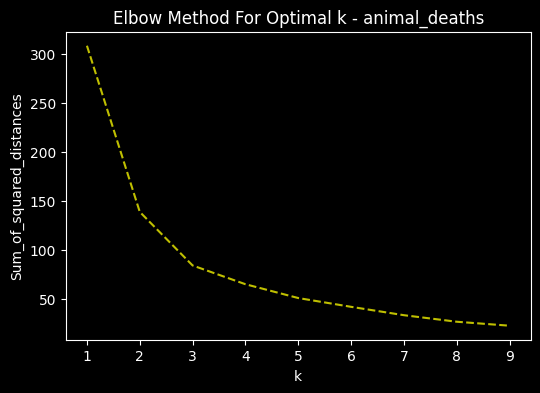

In [72]:
#Plot Elbow - animal_deaths
figure = plt.figure(figsize = (6, 4))
plt.plot(K, sum_sq_dist_animal_deaths, 'y--')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k - animal_deaths')
plt.show()

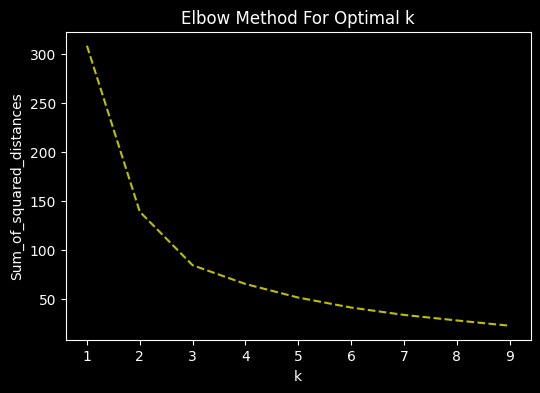

## Other clustering methods

We are going to explore other clustering methods, such as Mean-Shift.

You can read more about it in the next ressource:
https://scikit-learn.org/stable/modules/clustering.html


Apply the method to our datasets made of 2 variables ("Obesity" vs "Deaths")

In [24]:
# Mean-Shift
from sklearn.cluster import MeanShift, estimate_bandwidth


Plot the obtained clusters

Check out other algorithms such as DBSAN or OPTICS, why are these algorithms very interesting and in what cases? 

In [25]:
from sklearn.cluster import DBSCAN


# Regression and prediction

Given this dataset and the emphasis we have already laid on deaths through clustering, it would be interesting to study this dataset for a classification purpose and see how accurately we can predict the mortality rate in fonction of the given features.

## Creating train and test sets 

Let's separate the data into a training and testing sets using random selection.

Now drop the labels from the training set and create a new variable for the labels.

Scale the datasets.

## Random Forest

Let's try a random forest model on the prepared fat_quantity training set.

Now we predict.

Let's perform a 10 fold cross validation.
And display the resulting scores:

## Learning Curves analysis 

Use the function seen in **Module 1 to plot learning curves with cross validation.** 

In [26]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    pass

Try to interpret the obtained learning curve.

Perform a grid search to try to obtain the best hyperparameters. What is the best score that you obtained?

## SVM

Use the SVM regressor to estimate the death rate. See if you can get a better model than with the Random forest regressor.

## Linear regression

# Dimensionality reduction

Let's take a look at the whole dataset and see if there are any clusters.

In order to do these perform and plot a PCA of 2 components.

Dimensionality reduction is a way to reduce the number of features in your dataset without having to lose much information and keep the model’s performance. Check out the Random Forest based method and PCA for dimensionality reduction in the following ressource:

https://www.analyticsvidhya.com/blog/2018/08/dimensionality-reduction-techniques-python/

## Random Forest feature selection

Plot the feature importance graph.

Comment the graph.

## PCA dimensionality reduction

PCA is a technique which helps us in extracting a new set of variables from an existing large set of variables. Apply clustering methods on this new set of variables. Are the clusters obtained different than the clusters obtained on the "Obesity" vs "Deaths"?

Apply the Elbow method to determne the right number of clusters.

Use diverse methods to cluster the countries.